
 
# ------------ 1/ Reductions ------------ # 
 

The Total mean is :  5.5
The mean of each row :  [1.5 5.5 9.5]
The mean of each column :  [4. 5. 6. 7.]

 
# ------------ 2/ Outer product ------------ # 
 

The outer product of u & v using outer function : 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
The outer product of u & v using list comprehension : 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
The outer product of u & v Using numpy broadcasting operations : 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

 
# ------------ 3/ Matrix masking ------------ # 
 

 The Original matrix 
 [[0.93164732 2.04613678 1.60838893 0.62316315 1.58357686 1.58157934]
 [2.06417333 2.45628702 1.93596402 2.6265981  1.60245467 2.38743676]
 [0.48293944 1.68201852 1.56214697 0.         2.65706858 2.19069718]
 [2.62046873 0.94867445 2.9338944  0.         2.23839245 2.41981821]
 [2.8616864  1.90632715 0.76053826 0.77365316 2.99959182 2.63373684]
 [1.162870

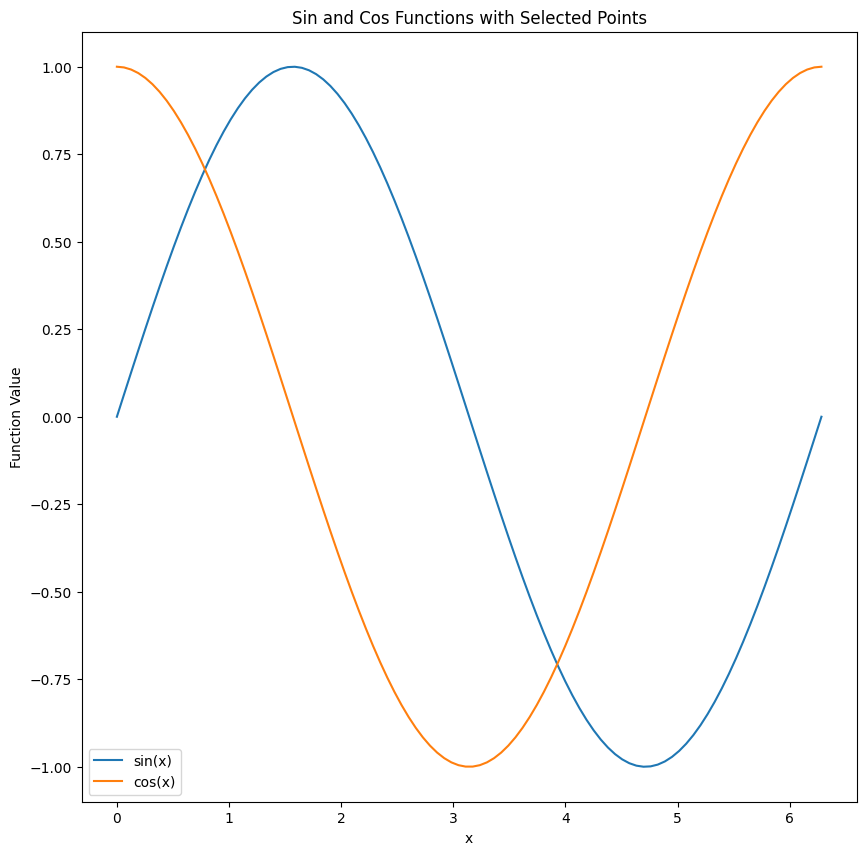

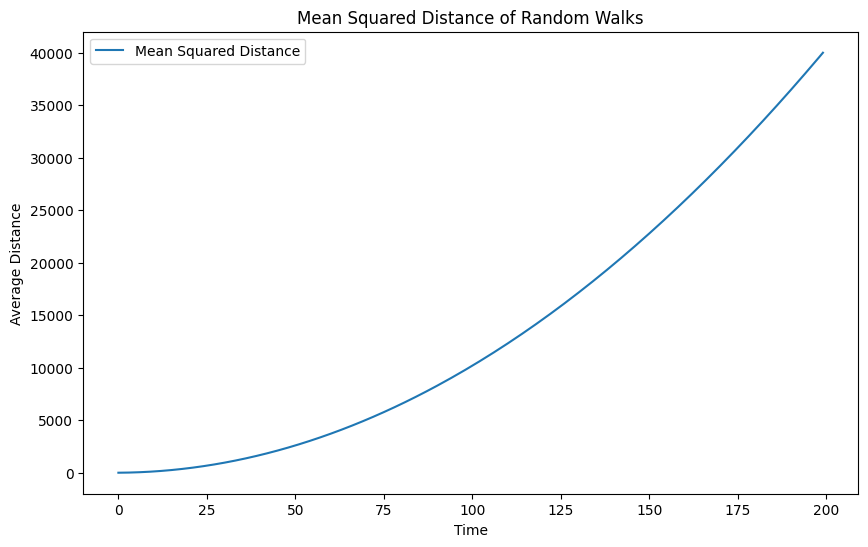

In [1]:
#***************************************** Reductions *****************************************
import timeit

print('\n \n# ------------ 1/ Reductions ------------ # \n \n')

import numpy as np
m = np.arange(12).reshape((3, 4))
total_mean = np.mean(m)
print('The Total mean is : ',m.mean())
print('The mean of each row : ',m.mean(axis=1) )
print('The mean of each column : ',m.mean(axis=0))

#***************************************** Outer product *****************************************
print('\n \n# ------------ 2/ Outer product ------------ # \n \n')

u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
w = np.array([i*j for i in u for j in v]).reshape((len(u),len(v)))

print('The outer product of u & v using outer function : \n', np.outer(u,v))
print('The outer product of u & v using list comprehension : \n', w)
print('The outer product of u & v Using numpy broadcasting operations : \n', v*u[:,None])

#***************************************** Matrix masking *****************************************
print('\n \n# ------------ 3/ Matrix masking ------------ # \n \n')

matrix_masking = np.random.uniform(0, 3, size=(10, 6))
mask = matrix_masking < 0.3
matrix_masking[mask] = 0

print(' The Original matrix \n',matrix_masking )
print(' Matrix after Matrix Masking : \n', matrix_masking*mask)

#***************************************** Trigonometric functions *****************************************
print('\n \n# ------------ 4/ Trigonometric functions ------------ # \n \n')

import matplotlib.pyplot as plt

list = np.linspace(0, 2* np.pi, num = 100)

print('Array of 100 number between 0 and  2 pi inclut : \n ', u)
print('Extracting every 10th element : ', list[0::10])
print('Reversing the array using the slice notation : \n', list[::-1])

mask = np.abs(np.sin(list) - np.cos(list)) < 0.1
print('Elements where the absolute difference between the sin and cos functions evaluated for that element is < 0.1 : \n', list[mask])

plt.figure(figsize=(10, 10))
plt.plot(list, np.sin(list),label='sin(x)')
plt.plot(list, np.cos(list), label='cos(x)')
plt.title('Sin and Cos Functions with Selected Points')
plt.xlabel('x')
plt.ylabel('Function Value')
plt.legend()
#plt.show()

#***************************************** Matrices *****************************************
print('\n \n# ------------ 5/ Matrices ------------ # \n \n')

n = 10
multiplication_table = np.fromfunction(lambda i, j: (i + 1) * (j + 1), (n, n), dtype=int)

trace_matrix = np.trace(multiplication_table)
anti_diagonal_matrix = np.fliplr(multiplication_table)
diagonal_offset = np.diag(multiplication_table, k=1)

print("Multiplication Table Matrix:\n" ,multiplication_table)
print("\n Trace of the Matrix: \n", trace_matrix)
print("\n Anti-diagonal Matrix: \n" , anti_diagonal_matrix)
print("\n Diagonal Offset by 1 Upwards: \n " , diagonal_offset)


#***************************************** Broadcasting *****************************************
print('\n \n# ------------ 6/ Broadcasting ------------ # \n \n')

Miles  = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
distance_Miles = np.abs(Miles  - Miles[:, np.newaxis])
distance_Km = distance_Miles * 1.60934

print(' \n 2D grid of distances among each city along Route 66 : \n',distance_Miles )
print(' \n 2D grid of distances in Km : \n ',distance_Km  )



#***************************************** Prime numbers sieve *****************************************
print('\n \n# ------------ 7/ Prime numbers sieve ------------ # \n \n')

N = 99
def prime(N):
    mask = np.ones(N + 1, dtype=bool)
    for i in range(2, N + 1):
        mask[i + 1:N + 1] *= np.invert((np.arange(i + 1, N + 1) % i == 0))
    return np.where(mask)

def sieve_Eratosthenes(N):
    mask = np.ones(N + 1, dtype=bool)
    p = 2
    while (p * p <= N):
        mask[p + 1:N + 1] *= np.invert((np.arange(p + 1, N + 1) % p == 0))
        p += 1
    return np.where(mask)


print("\n The prime numbers in the 0-N range is  : \n ", prime(N))
print(" \n The prime numbers in the 0-N with optimization suggested in the sieve of Eratosthenes : is  \n ", sieve_Eratosthenes(N))

for i in range(100, 1000, 100):
    debut = timeit.default_timer()
    sieve_Eratosthenes(i)
    fin = timeit.default_timer()
    x = fin - debut
    print('The execution time for N = ', i, ' is : ', x)

#  we can notice that when N increase the more the execution time we have .
print('we can notice that when N increase the more the execution time we have .')

#***************************************** Diffusion using random walk *****************************************
print('\n \n# ------------ 8/ Diffusion using random walk ------------ # \n \n')


walkers = 1000
steps = 200

random_walks = 2* np.random.randint(0,1,(walkers, steps)) - 1
walk_distance = np.cumsum(random_walks, axis=1)
mean = np.mean(walk_distance**2, axis=0)

print('\n The 2D array of size walkers * steps \n ' , random_walks)
print('\n The walking distances for each walker \n ' , walk_distance)
print('\n The mean of the squared distances at each step \n ' , mean)


plt.figure(figsize=(10, 6))
plt.plot(np.arange(steps), mean, label='Mean Squared Distance')
plt.xlabel('Time')
plt.ylabel('Average Distance')
plt.title('Mean Squared Distance of Random Walks')
plt.legend()
plt.show()




